In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading data files
df_abundance = pd.read_csv('../HW1/input/abundance_table.csv', index_col=0)
df_metadata = pd.read_csv('../HW1/input/metadata_table.csv', index_col=0)


In [3]:
# Samples and species counts
print(f'Number of samples in abundance table: {df_abundance.shape[0]};\nNumber of bacterial species in abundance table: {df_abundance.shape[1]}')
print('*'*50)

# Top 5 prevalent species
presence_count = (df_abundance > 0).sum(axis=0)
top5_prevalent = presence_count.sort_values(ascending=False).head(5)
print('Top 5 most prevalent species (number of samples present in):')
print(top5_prevalent)
print('*'*50)

# Top 5 species with the highest mean relative abundance
mean_abundance = df_abundance.mean(axis=0)
top5_mean_abundance = mean_abundance.sort_values(ascending=False).head(5)
print('Top 5 species with the highest mean relative abundance:')
print(top5_mean_abundance)

Number of samples in abundance table: 400;
Number of bacterial species in abundance table: 30
**************************************************
Top 5 most prevalent species (number of samples present in):
Lactobacillus acidophilus     76
Bifidobacterium bifidum       73
Roseburia intestinalis        70
Escherichia coli              69
Ruminococcus_D bicirculans    68
dtype: int64
**************************************************
Top 5 species with the highest mean relative abundance:
Lactobacillus acidophilus    0.046176
Ruminococcus_E bromii_B      0.041099
Bifidobacterium bifidum      0.040399
Dialister invisus            0.039670
Eubacterium_R faecale        0.039595
dtype: float64


/tmp/ipykernel_5590/3944438768.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_bar = plt.cm.get_cmap('viridis')(np.linspace(0.3, 0.9, len(top_prevalent_species)))


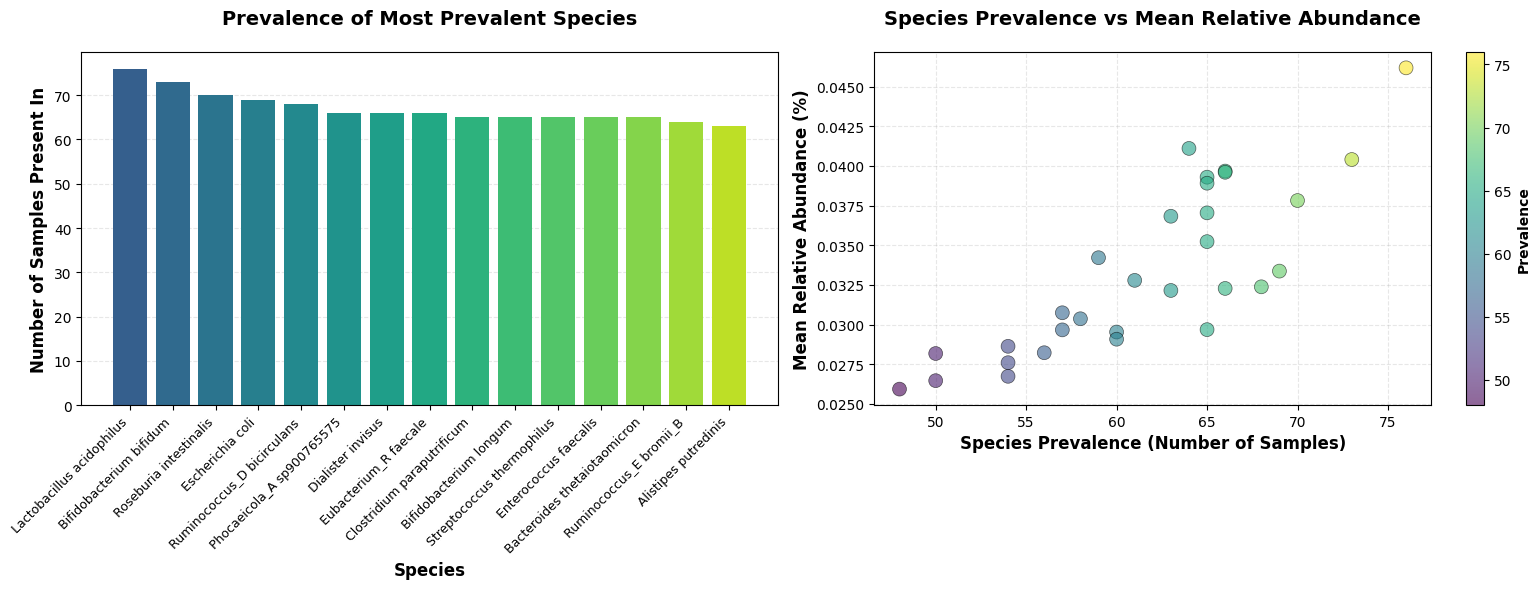

Total number of species plotted in scatter plot: 30
Prevalence range: 48 - 76 samples
Mean relative abundance range: 0.03% - 0.05%


In [7]:
# Calculate species prevalence and mean relative abundance
species_prevalence = (df_abundance > 0).sum(axis=0)
species_mean_abundance = df_abundance.mean(axis=0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar plot of the most prevalent species
top_n = 15  # Show top 15 most prevalent species
top_prevalent_species = species_prevalence.sort_values(ascending=False).head(top_n)
colors_bar = plt.cm.get_cmap('viridis')(np.linspace(0.3, 0.9, len(top_prevalent_species)))
ax1.bar(range(len(top_prevalent_species)), top_prevalent_species.values, color=colors_bar)
ax1.set_xticks(range(len(top_prevalent_species)))
ax1.set_xticklabels(top_prevalent_species.index, rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Number of Samples Present In', fontsize=12, fontweight='bold')
ax1.set_xlabel('Species', fontsize=12, fontweight='bold')
ax1.set_title('Prevalence of Most Prevalent Species', fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Plot 2: Scatter plot of species prevalence vs mean relative abundance
ax2.scatter(species_prevalence, species_mean_abundance, alpha=0.6, s=100, 
            c=species_prevalence, cmap='viridis', edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Species Prevalence (Number of Samples)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Relative Abundance (%)', fontsize=12, fontweight='bold')
ax2.set_title('Species Prevalence vs Mean Relative Abundance', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Add colorbar for the scatter plot
cbar = plt.colorbar(ax2.collections[0], ax=ax2)
cbar.set_label('Prevalence', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../HW1/output/species_prevalence_abundance_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Total number of species plotted in scatter plot: {len(species_prevalence)}')
print(f'Prevalence range: {species_prevalence.min()} - {species_prevalence.max()} samples')
print(f'Mean relative abundance range: {species_mean_abundance.min():.2f}% - {species_mean_abundance.max():.2f}%')